<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<img src = "https://github.com/Jangrae/img/blob/master/air.png?raw=true" width=800 align="left"/>

# 실습 내용

- 머신러닝 모델링을 위한 코딩은 무조건 할 수 있어야 합니다.
- 코딩 내용을 자세히 알지 못해도 **무작정** 코딩을 진행해봅니다.
- AirQuality 데이터를 대상으로 모델링 해서 오존 농도를 예측해 봅니다.
- LinearRegression 알고리즘을 사용합니다.

# 1.환경 준비

- 기본 **라이브러리**와 대상 **데이터**를 가져와 이후 과정을 준비합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_11.png?raw=true" width=700 align="left"/>

In [2]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

In [4]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/airquality_simple.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 **충분히 이해**할 수 있도록 다양한 **탐색** 과정을 수행합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_12.png?raw=true" width=700 align="left"/>

In [6]:
# 상위 몇 개 행 확인
data.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41,190.0,7.4,67,5,1
1,36,118.0,8.0,72,5,2
2,12,149.0,12.6,74,5,3
3,18,313.0,11.5,62,5,4
4,19,NaN,14.3,56,5,5


In [8]:
# 하위 몇 개 행 확인
data.tail()

,Ozone,Solar.R,Wind,Temp,Month,Day
148,30,193.0,6.9,70,9,26
149,23,145.0,13.2,77,9,27
150,14,191.0,14.3,75,9,28
151,18,131.0,8.0,76,9,29
152,20,223.0,11.5,68,9,30


In [10]:
# 변수 확인
data.columns

Index(['Ozone', 'Solar.R', 'Wind', 'Temp', 'Month', 'Day'], dtype='object')

In [14]:
# 기술통계 확인
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Ozone,153.0,42.052288,30.156127,1.0,20.00,34.0,59.00,168.0
Solar.R,146.0,185.931507,90.058422,7.0,115.75,205.0,258.75,334.0
Wind,153.0,9.957516,3.523001,1.7,7.40,9.7,11.50,20.7
Temp,153.0,77.882353,9.465270,56.0,72.00,79.0,85.00,97.0
Month,153.0,6.993464,1.416522,5.0,6.00,7.0,8.00,9.0
Day,153.0,15.803922,8.864520,1.0,8.00,16.0,23.00,31.0


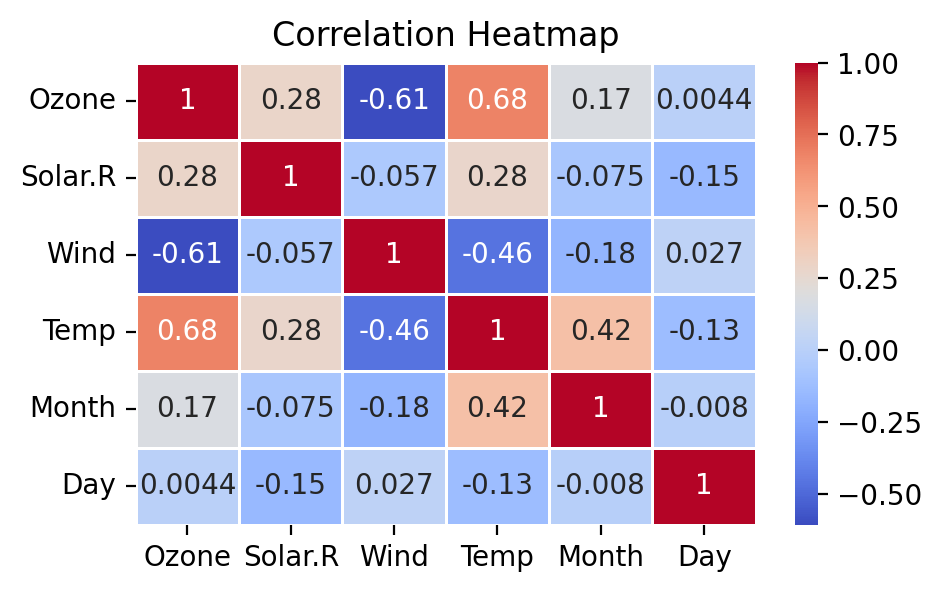

In [30]:
# 상관관계 확인
correlation_matrix = data.corr(numeric_only = True)

plt.figure(figsize=(5, 3))  # 히트맵 크기 설정
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()

In [32]:
data.corr(numeric_only = True).style.background_gradient()

,Ozone,Solar.R,Wind,Temp,Month,Day
Ozone,1.000000,0.280068,-0.605478,0.683372,0.174197,0.004419
Solar.R,0.280068,1.000000,-0.056792,0.275840,-0.075301,-0.150275
Wind,-0.605478,-0.056792,1.000000,-0.457988,-0.178293,0.027181
Temp,0.683372,0.275840,-0.457988,1.000000,0.420947,-0.130593
Month,0.174197,-0.075301,-0.178293,0.420947,1.000000,-0.007962
Day,0.004419,-0.150275,0.027181,-0.130593,-0.007962,1.000000


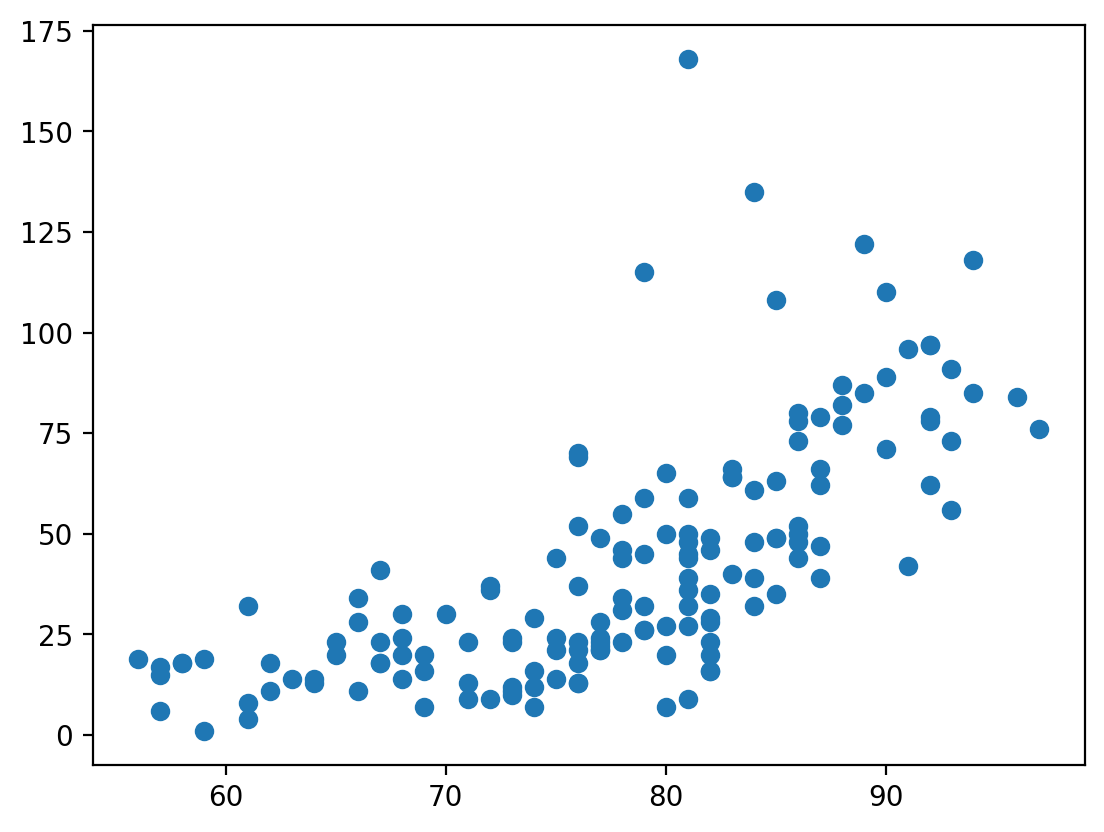

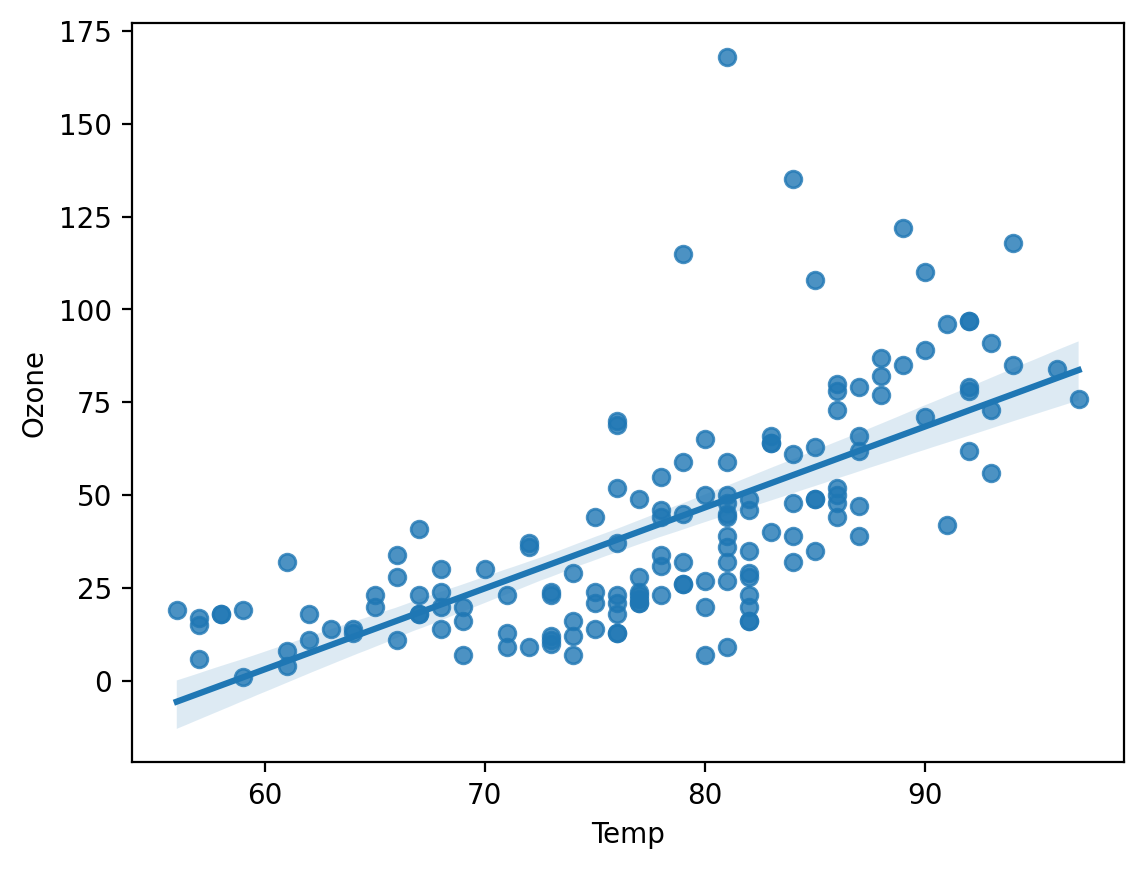

In [46]:
# scatter plot 시각화 

plt.scatter(data['Temp'] , data['Ozone'])
plt.show()

# sns regplot
sns.regplot(x='Temp',y='Ozone',data=data)
plt.show()

# 3.데이터 준비

- **전처리** 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_13.png?raw=true" width=700 align="left"/>

**1) 결측치 처리**

- 결측치가 있으면 제거하거나 적절한 값으로 채웁니다.

In [34]:
# 결측치 확인
data.isna().sum()

Ozone      0
Solar.R    7
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

In [48]:
# 전날 값으로 결측치 채우기 method = ffill
#data_fillna=data.fillna(method = 'ffill')
data.ffill(inplace=True)
# 확인
data.isna().sum()

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

**2) 변수 제거**

- 분석에 의미가 없다고 판단되는 변수는 제거합니다.

In [50]:
# 변수 제거: month ,day 열은 상관관계 분석에 의미가 없음  
drop_cols = ['Month','Day']
data.drop(columns = drop_cols, inplace = True)

# 확인
data.head()

,Ozone,Solar.R,Wind,Temp
0,41,190.0,7.4,67
1,36,118.0,8.0,72
2,12,149.0,12.6,74
3,18,313.0,11.5,62
4,19,313.0,14.3,56


**3) x, y 분리**

- 우선 target 변수를 명확히 지정합니다.
- target을 제외한 나머지 변수들 데이터는 x로 선언합니다.
- target 변수 데이터는 y로 선언합니다. 
- 이 결과로 만들어진 x는 데이터프레임, y는 시리즈가 됩니다.
- 이후 모든 작업은 x, y를 대상으로 진행합니다.

In [54]:
# target 확인
target ='Ozone'
# 데이터 분리 선형 회귀모형 예측모델 생성 , target을 제외한 독립변수들  x
x = data.drop(target , axis =1)
# 종속변수 y =target
y = data.loc[:,target]


0      41
1      36
2      12
3      18
4      19
       ..
148    30
149    23
150    14
151    18
152    20
Name: Ozone, Length: 153, dtype: int64

**4) 학습용, 평가용 데이터 분리**

- 학습용, 평가용 데이터를 적절한 비율로 분리합니다.
- 반복 실행 시 동일한 결과를 얻기 위해 random_state 옵션을 지정합니다.

In [70]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split
# 7:3으로 분리
# x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.3) # 데이터분리 는 완전 랜덤으로 분할한다
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.3, random_state=1)# random seed 고정 

# 4.모델링

- 본격적으로 모델을 **선언**하고 **학습**하고 **평가**하는 과정을 진행합니다.
- 우선 **회귀** 문제인지 **분류** 문제인지 명확히 구분합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_14.png?raw=true" width=700 align="left"/>

**1) 모델링**

- 회귀 문제 인가요? 분류 문제인가요?
- 회귀인지 분류인지에 따라 사용할 알고리즘과 평가 방법이 달라집니다.
- 우선 다음 알고리즘과 평가 방법을 사용합니다.
    - 알고리즘: LinearRegression
    - 평가방법: mean_absolute_error

In [72]:
# 1단계: 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [74]:
# 2단계: 선언하기
model = LinearRegression()

In [76]:
# 3단계: 학습하기
model.fit(x_train,y_train)

LinearRegression()

In [78]:
# 4단계: 예측하기
y_predict = model.predict(x_test)

In [80]:
# 5단계: 평가하기
mean_absolute_error(y_test, y_predict) # 오차가 매우 큼

13.976843190385708

In [86]:
# 예측값 확인 
y_predict[:10]

array([13.84003067,  5.82919112, 81.93563027, 58.41267418, 50.86150737,
       31.52971121, 66.8083547 , -8.56411529, 50.2136544 , 39.13346172])

In [88]:
# 실제값
y_test[:10].values

array([24, 18, 97, 47, 34, 22, 66, 18, 69, 27], dtype=int64)

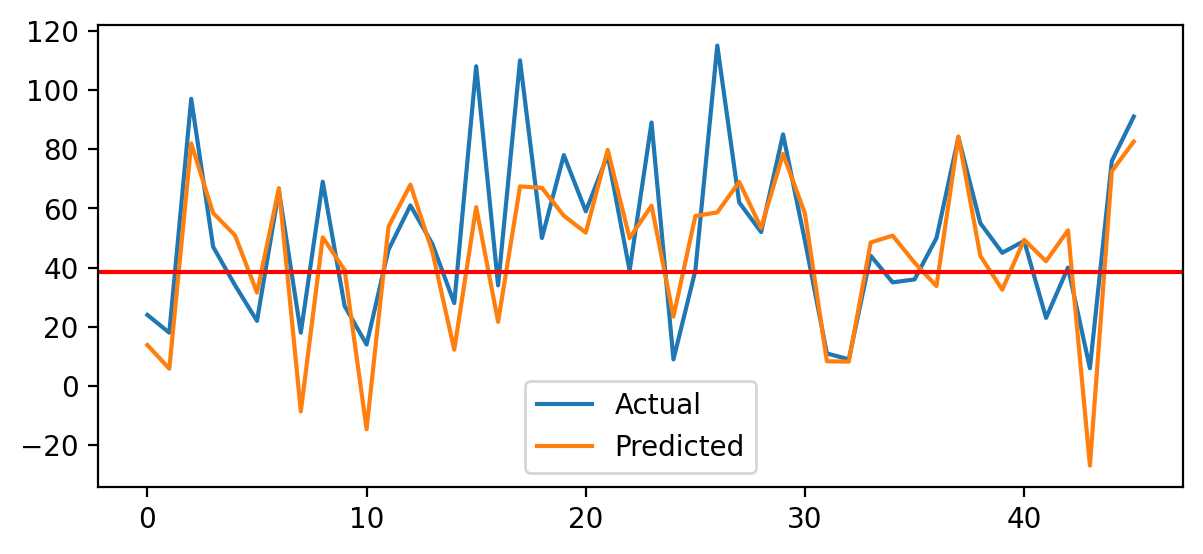

In [96]:
# 시각화
plt.figure(figsize=(7,3))
plt.plot(y_test.values ,label= 'Actual')
plt.plot(y_predict, label='Predicted')
plt.axhline(y_train.mean(), color = 'r')
plt.legend()
plt.show()
# 회귀모형 성능 평가  baseline = 평균
# 분류모형   ''       baseline = 최빈값